In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
demo=pd.read_csv("Parkinson's.csv")
demo

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
demo.dtypes
#Status is dependent variable
#rest all others are independent variables
#The Name column does not really have clear role in the given data set as it does not affect the scientific/clinical 
#investigation/research in the given case

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
demo.describe()
#We have no null values

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
demo.shape

(195, 24)

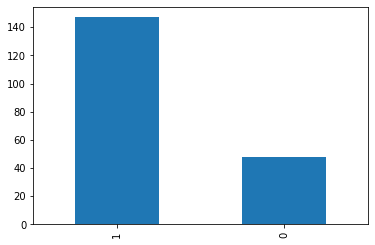

In [6]:
demo.status.value_counts().plot(kind='bar')

In [7]:
#Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

*****Mean**** 154.22864102564105

*****Tail****
 190    174.188
191    209.516
192    174.688
193    198.764
194    214.289
Name: MDVP:Fo(Hz), dtype: float64

*****Variance****
 1713.137459932328


***DISTRIBUTION***


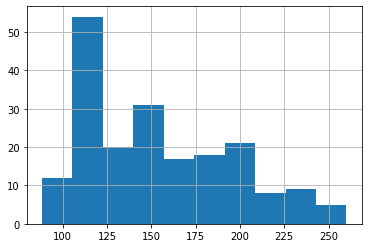

In [8]:
#Average vocal fundamental frequency
print("*****Mean****",demo['MDVP:Fo(Hz)'].mean())
print("\n*****Tail****\n",demo['MDVP:Fo(Hz)'].tail())
print("\n*****Variance****\n",demo['MDVP:Fo(Hz)'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:Fo(Hz)'].hist()
#plt.boxplot(demo['MDVP:Fo(Hz)'])::::Box plot has not given any outliers
#the curve is not normally distributed: frequency is not normally distributed

*****Mean**** 197.104917948718

*****Tail****
 190    230.978
191    253.017
192    240.005
193    396.961
194    260.277
Name: MDVP:Fhi(Hz), dtype: float64

*****Variance****
 8370.703288653029


***DISTRIBUTION***


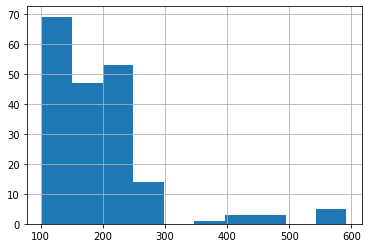

In [9]:
print("*****Mean****",demo['MDVP:Fhi(Hz)'].mean())
print("\n*****Tail****\n",demo['MDVP:Fhi(Hz)'].tail())
print("\n*****Variance****\n",demo['MDVP:Fhi(Hz)'].var())

print("\n\n***DISTRIBUTION***")

demo['MDVP:Fhi(Hz)'].hist()
#plt.boxplot(demo['MDVP:Fhi(Hz)'])
#From plot we are able to see the outliers in case of Maximum vocal fundamental frequency. 
#These values are unequally distributed but do not show their impact over the analysis. 
#Hence, we need not drop any of the values. Nor replace the same with the median

*****Mean**** 116.32463076923077

*****Tail****
 190    94.261
191    89.488
192    74.287
193    74.904
194    77.973
Name: MDVP:Flo(Hz), dtype: float64

*****Variance****
 1894.1134053578096


***DISTRIBUTION***


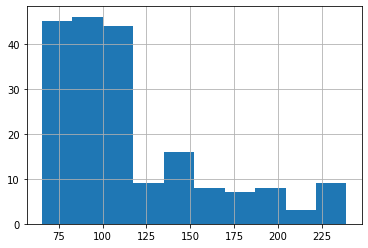

In [10]:
print("*****Mean****",demo['MDVP:Flo(Hz)'].mean())
print("\n*****Tail****\n",demo['MDVP:Flo(Hz)'].tail())
print("\n*****Variance****\n",demo['MDVP:Flo(Hz)'].var())

print("\n\n***DISTRIBUTION***")


demo['MDVP:Flo(Hz)'].hist()
#We can see here that there are no outliers that affect the analysis. 
#but the asymmetric distribution of the values can be seen on the right hand side

#the plot given for minimum fundamental vocal frequency sees a few outliers but are not as distict that can be dropped.
#the same can be justified using a hist plot. the distribution is not symmetric/normal but no such values that can be dropped

*****Mean**** 0.006220461538461539

*****Tail****
 190    0.00459
191    0.00564
192    0.01360
193    0.00740
194    0.00567
Name: MDVP:Jitter(%), dtype: float64

*****Variance****
 2.3504400301348154e-05


***DISTRIBUTION***


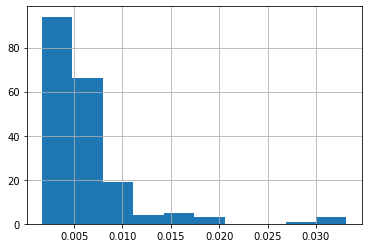

In [11]:
print("*****Mean****",demo['MDVP:Jitter(%)'].mean())
print("\n*****Tail****\n",demo['MDVP:Jitter(%)'].tail())
print("\n*****Variance****\n",demo['MDVP:Jitter(%)'].var())

print("\n\n***DISTRIBUTION***")


demo['MDVP:Jitter(%)'].hist()
#From plot we are able to see the outliers. The curve is also asymmetrically distributed. 
#Outliers can be replaced with median
#We can clearly see outliers in case of jitter percentage. For performing operations, we shall require to take the median 
#and replace outliers with median where the percentage is more than a given 0.020
#same can e be justified using a hist plot

*****Mean**** 4.395897435897438e-05

*****Tail****
 190    0.00003
191    0.00003
192    0.00008
193    0.00004
194    0.00003
Name: MDVP:Jitter(Abs), dtype: float64

*****Variance****
 1.212565318530267e-09


***DISTRIBUTION***


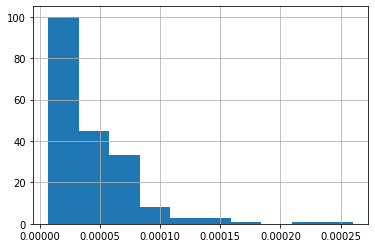

In [12]:
print("*****Mean****",demo['MDVP:Jitter(Abs)'].mean())
print("\n*****Tail****\n",demo['MDVP:Jitter(Abs)'].tail())
print("\n*****Variance****\n",demo['MDVP:Jitter(Abs)'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:Jitter(Abs)'].hist()

#After analysing the hist plot, we can find that most of the absolute value is concentrated till 0.00015. 
#And has outliers from 0.00020 to 0.00025. 
#These values maybe required to be replaced by the median of the column

*****Mean**** 0.0033064102564102577

*****Tail****
 190    0.00263
191    0.00331
192    0.00624
193    0.00370
194    0.00295
Name: MDVP:RAP, dtype: float64

*****Variance****
 8.80768498546128e-06


***DISTRIBUTION***


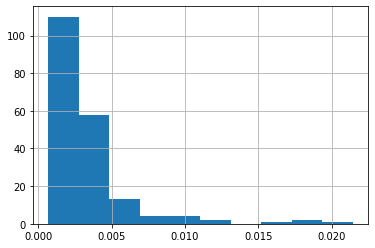

In [13]:
print("*****Mean****",demo['MDVP:RAP'].mean())
print("\n*****Tail****\n",demo['MDVP:RAP'].tail())
print("\n*****Variance****\n",demo['MDVP:RAP'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:RAP'].hist()

#outlier range is very minimal so that can be either replaced with median or can be kept as it is as showing no impact

*****Mean**** 0.003446358974358974

*****Tail****
 190    0.00259
191    0.00292
192    0.00564
193    0.00390
194    0.00317
Name: MDVP:PPQ, dtype: float64

*****Variance****
 7.611952138514403e-06


***DISTRIBUTION***


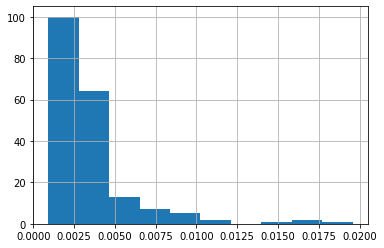

In [14]:
print("*****Mean****",demo['MDVP:PPQ'].mean())
print("\n*****Tail****\n",demo['MDVP:PPQ'].tail())
print("\n*****Variance****\n",demo['MDVP:PPQ'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:PPQ'].hist()

#the outliers can be seen nearly before 0.015 till 0.020. Curve is asymmetrically distributed but if required, outliers can be replaced by median

*****Mean**** 0.009919948717948712

*****Tail****
 190    0.00790
191    0.00994
192    0.01873
193    0.01109
194    0.00885
Name: Jitter:DDP, dtype: float64

*****Variance****
 7.926954071900607e-05


***DISTRIBUTION***


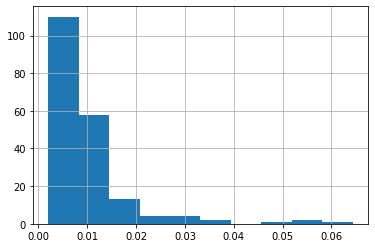

In [15]:
print("*****Mean****",demo['Jitter:DDP'].mean())
print("\n*****Tail****\n",demo['Jitter:DDP'].tail())
print("\n*****Variance****\n",demo['Jitter:DDP'].var())

print("\n\n***DISTRIBUTION***")
demo['Jitter:DDP'].hist()

#We can see a distinctive values nearly from 0.05 to 0.06 and bit above. 
#These values might be required to be arranged for mathematical ease

*****Mean**** 0.0297091282051282

*****Tail****
 190    0.04087
191    0.02751
192    0.02308
193    0.02296
194    0.01884
Name: MDVP:Shimmer, dtype: float64

*****Variance****
 0.0003555838791329631


***DISTRIBUTION***


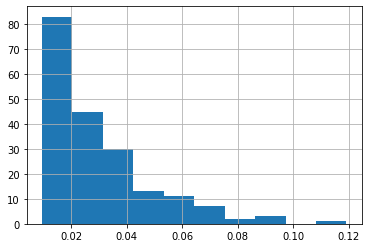

In [16]:
print("*****Mean****",demo['MDVP:Shimmer'].mean())
print("\n*****Tail****\n",demo['MDVP:Shimmer'].tail())
print("\n*****Variance****\n",demo['MDVP:Shimmer'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:Shimmer'].hist()

# the Shimmer value is mostly concentrated from 0.02 to 0.08. we can see one set of values outlying near to point 0.12

*****Mean****
 0.2822512820512821

*****Tail****
 190    0.405
191    0.263
192    0.256
193    0.241
194    0.190
Name: MDVP:Shimmer(dB), dtype: float64

*****Variance****
 0.03797715818133753


***DISTRIBUTION***


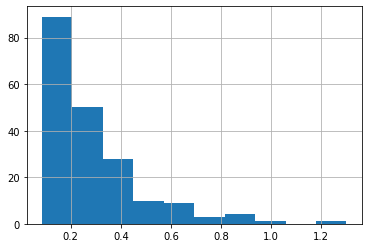

In [17]:
print("*****Mean****\n",demo['MDVP:Shimmer(dB)'].mean())
print("\n*****Tail****\n",demo['MDVP:Shimmer(dB)'].tail())
print("\n*****Variance****\n",demo['MDVP:Shimmer(dB)'].var())

print("\n\n***DISTRIBUTION***")
demo['MDVP:Shimmer(dB)'].hist()

#the Shimmer(db) value is mostly concentrated from 0.2 to 1.0. we can see one set of values outlying near to point 1.2. 
#this value does not require any amendment. We can take this in concern while performing statisctical analysis

*****Mean****
 0.015664153846153845

*****Tail****
 190    0.02336
191    0.01604
192    0.01268
193    0.01265
194    0.01026
Name: Shimmer:APQ3, dtype: float64

*****Variance****
 0.00010308669038858046


***DISTRIBUTION***


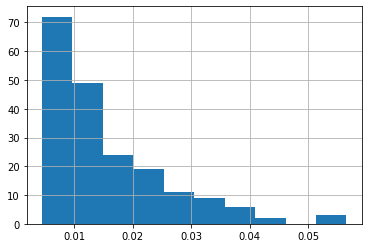

In [18]:
print("*****Mean****\n",demo['Shimmer:APQ3'].mean())
print("\n*****Tail****\n",demo['Shimmer:APQ3'].tail())
print("\n*****Variance****\n",demo['Shimmer:APQ3'].var())

print("\n\n***DISTRIBUTION***")
demo['Shimmer:APQ3'].hist()

#Symmetric distribution is present with one set of outliers

*****Mean****
 0.01787825641025642

*****Tail****
 190    0.02498
191    0.01657
192    0.01365
193    0.01321
194    0.01161
Name: Shimmer:APQ5, dtype: float64

*****Variance****
 0.0001445694948823686


***DISTRIBUTION***


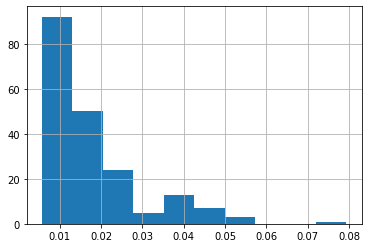

In [19]:
print("*****Mean****\n",demo['Shimmer:APQ5'].mean())
print("\n*****Tail****\n",demo['Shimmer:APQ5'].tail())
print("\n*****Variance****\n",demo['Shimmer:APQ5'].var())

print("\n\n***DISTRIBUTION***")
demo['Shimmer:APQ5'].hist()

#Symmetric distribution is present with one set of outliers

*****Mean****
 0.02408148717948718

*****Tail****
 190    0.02745
191    0.01879
192    0.01667
193    0.01588
194    0.01373
Name: MDVP:APQ, dtype: float64

*****Variance****
 0.0002871918694263811


***DISTRIBUTION***


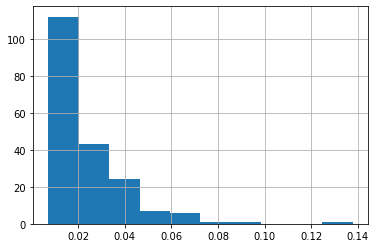

In [20]:
print("*****Mean****\n",demo['MDVP:APQ'].mean())
print("\n*****Tail****\n",demo['MDVP:APQ'].tail())
print("\n*****Variance****\n",demo['MDVP:APQ'].var())

print("\n\n***DISTRIBUTION***")


demo['MDVP:APQ'].hist()
#the box plot and hist plot both conclude that there is an extreme outlier between 0.12 and 0.14. This outlier can be replaced
#by the median of Amplitude Perturbation Quotient 

*****Mean****
 0.04699261538461537

*****Tail****
 190    0.07008
191    0.04812
192    0.03804
193    0.03794
194    0.03078
Name: Shimmer:DDA, dtype: float64

*****Variance****
 0.0009277579565265671


***DISTRIBUTION***


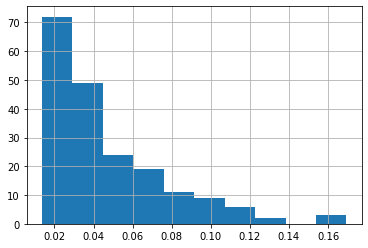

In [21]:
print("*****Mean****\n",demo['Shimmer:DDA'].mean())
print("\n*****Tail****\n",demo['Shimmer:DDA'].tail())
print("\n*****Variance****\n",demo['Shimmer:DDA'].var())

print("\n\n***DISTRIBUTION***")


demo['Shimmer:DDA'].hist()

#one outlieer can be seen between 0.14 to 0.18, if the same has very significant existance, it should be replaced by its median
#Additionally, the curve is symmetric at the right hand.

*****Mean****
 0.024847076923076923

*****Tail****
 190    0.02764
191    0.01810
192    0.10715
193    0.07223
194    0.04398
Name: NHR, dtype: float64

*****Variance****
 0.0016336509836796195


***DISTRIBUTION***


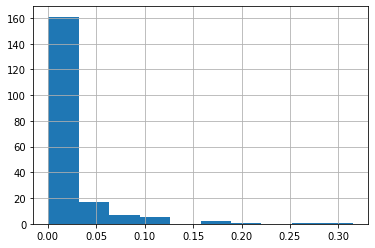

In [22]:
print("*****Mean****\n",demo['NHR'].mean())
print("\n*****Tail****\n",demo['NHR'].tail())
print("\n*****Variance****\n",demo['NHR'].var())

print("\n\n***DISTRIBUTION***")


demo['NHR'].hist()

#from histogram, we have quite a number of outliers and the distribution of the curve is not symmetric on either side

*****Mean****
 21.885974358974366

*****Tail****
 190    19.517
191    19.147
192    17.883
193    19.020
194    21.209
Name: HNR, dtype: float64

*****Variance****
 19.58738936531853


***DISTRIBUTION***


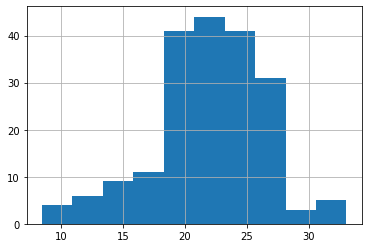

In [23]:
print("*****Mean****\n",demo['HNR'].mean())
print("\n*****Tail****\n",demo['HNR'].tail())
print("\n*****Variance****\n",demo['HNR'].var())

print("\n\n***DISTRIBUTION***")


demo['HNR'].hist()

#the histogram shows that there are no out liers and despite the curve not being very symmetric on either sides

*****Mean****
 0.4985355384615386

*****Tail****
 190    0.448439
191    0.431674
192    0.407567
193    0.451221
194    0.462803
Name: RPDE, dtype: float64

*****Variance****
 0.010803879936435367


***DISTRIBUTION***


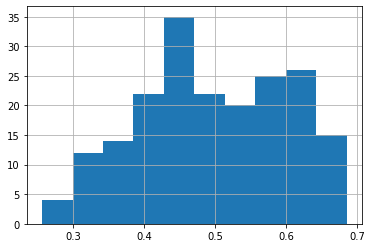

In [24]:
print("*****Mean****\n",demo['RPDE'].mean())
print("\n*****Tail****\n",demo['RPDE'].tail())
print("\n*****Variance****\n",demo['RPDE'].var())

print("\n\n***DISTRIBUTION***")


demo['RPDE'].hist()

#there are no outliers. But not a perfect symmetry can be seen in this column

*****Mean****
 0.7180990461538465

*****Tail****
 190    0.657899
191    0.683244
192    0.655683
193    0.643956
194    0.664357
Name: DFA, dtype: float64

*****Variance****
 0.0030620541201473437


***DISTRIBUTION***


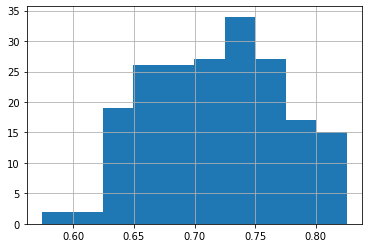

In [25]:
print("*****Mean****\n",demo['DFA'].mean())
print("\n*****Tail****\n",demo['DFA'].tail())
print("\n*****Variance****\n",demo['DFA'].var())

print("\n\n***DISTRIBUTION***")


demo['DFA'].hist()

#there are no outliers. But not a perfect symmetry can be seen in this column

*****Mean****
 -5.684396743589743

*****Tail****
 190   -6.538586
191   -6.195325
192   -6.787197
193   -6.744577
194   -5.724056
Name: spread1, dtype: float64

*****Variance****
 1.1885529681196452


***DISTRIBUTION***


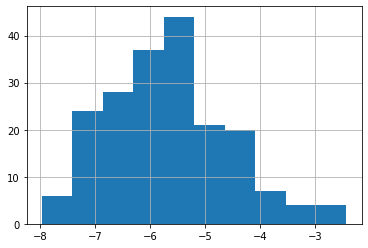

In [26]:
print("*****Mean****\n",demo['spread1'].mean())
print("\n*****Tail****\n",demo['spread1'].tail())
print("\n*****Variance****\n",demo['spread1'].var())

print("\n\n***DISTRIBUTION***")


demo['spread1'].hist()
#there are no outliers. But not a perfect symmetry can be seen in this column

*****Mean****
 0.2265103487179486

*****Tail****
 190    0.121952
191    0.129303
192    0.158453
193    0.207454
194    0.190667
Name: spread2, dtype: float64

*****Variance****
 0.00695652123829014


***DISTRIBUTION***


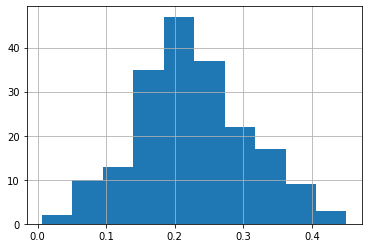

In [27]:
print("*****Mean****\n",demo['spread2'].mean())
print("\n*****Tail****\n",demo['spread2'].tail())
print("\n*****Variance****\n",demo['spread2'].var())

print("\n\n***DISTRIBUTION***")

demo['spread2'].hist()

#there are no outliers. But not a perfect symmetry can be seen in this column

*****Mean****
 2.3818260871794874

*****Tail****
 190    2.657476
191    2.784312
192    2.679772
193    2.138608
194    2.555477
Name: D2, dtype: float64

*****Variance****
 0.14653511003661598


***DISTRIBUTION***


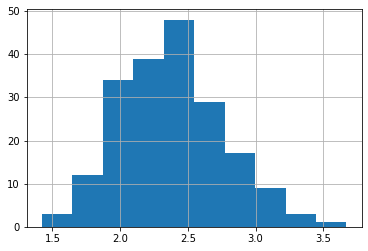

In [28]:
print("*****Mean****\n",demo['D2'].mean())
print("\n*****Tail****\n",demo['D2'].tail())
print("\n*****Variance****\n",demo['D2'].var())

print("\n\n***DISTRIBUTION***")

demo['D2'].hist()

#there are no outliers. But not a perfect symmetry can be seen in this column

*****Mean****
 0.20655164102564108

*****Tail****
 190    0.133050
191    0.168895
192    0.131728
193    0.123306
194    0.148569
Name: PPE, dtype: float64

*****Variance****
 0.008121492284664293


***DISTRIBUTION***


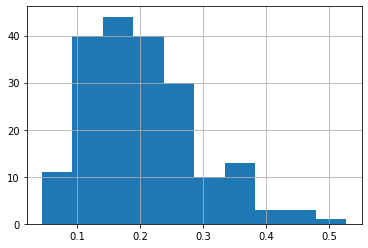

In [29]:
print("*****Mean****\n",demo['PPE'].mean())
print("\n*****Tail****\n",demo['PPE'].tail())
print("\n*****Variance****\n",demo['PPE'].var())

print("\n\n***DISTRIBUTION***")

demo['PPE'].hist()

#there are no outliers. But not a perfect symmetry can be seen in this column

In [30]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


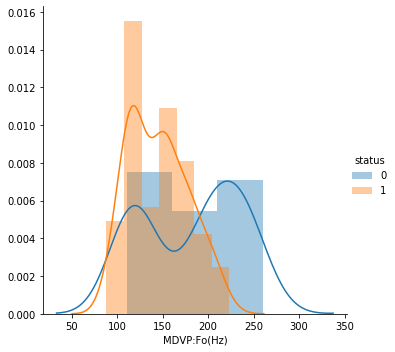

In [31]:
sns.FacetGrid(demo, hue='status', size=5).map(sns.distplot, "MDVP:Fo(Hz)").add_legend()

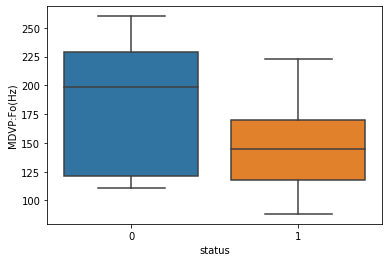

In [32]:
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=demo)

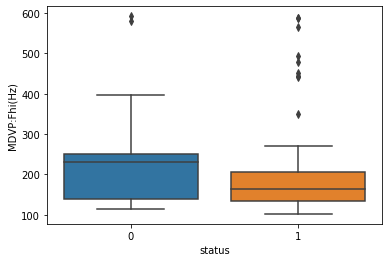

In [33]:
sns.boxplot(x='status', y='MDVP:Fhi(Hz)', data=demo)

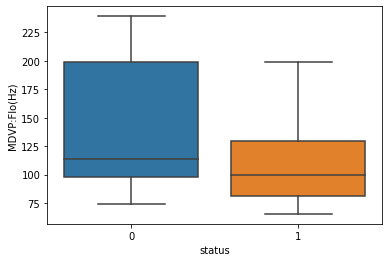

In [34]:
sns.boxplot(x='status', y='MDVP:Flo(Hz)', data=demo)

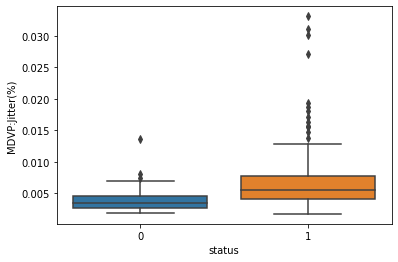

In [35]:
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=demo)

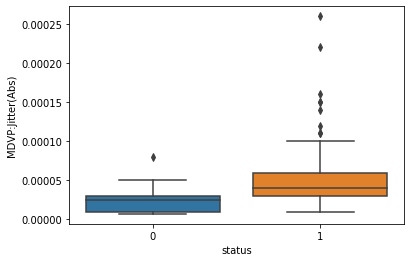

In [36]:
sns.boxplot(x='status', y='MDVP:Jitter(Abs)', data=demo)

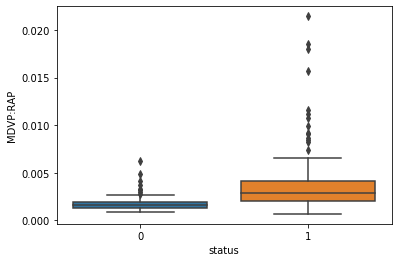

In [37]:
sns.boxplot(x='status', y='MDVP:RAP', data=demo)

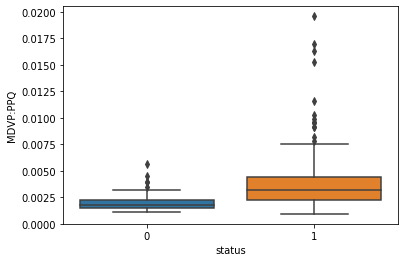

In [38]:
sns.boxplot(x='status', y='MDVP:PPQ', data=demo)

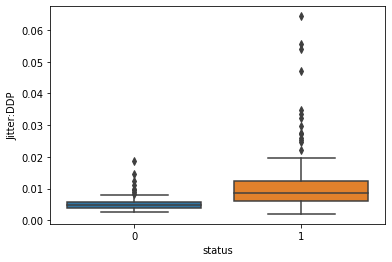

In [39]:
sns.boxplot(x='status', y='Jitter:DDP', data=demo)

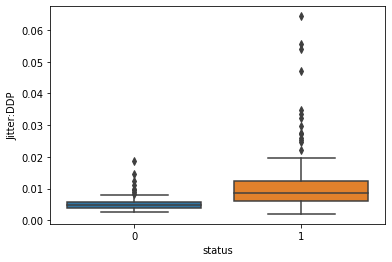

In [40]:
sns.boxplot(x='status', y='Jitter:DDP', data=demo)

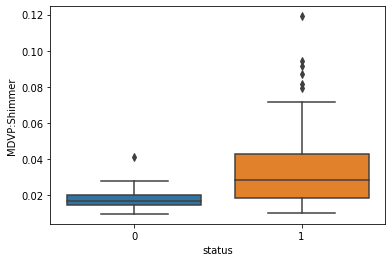

In [41]:
sns.boxplot(x='status', y='MDVP:Shimmer', data=demo)

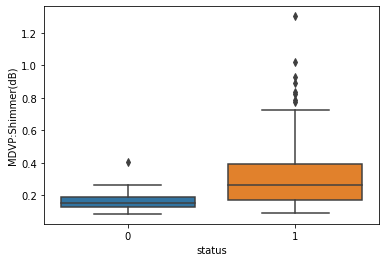

In [42]:
sns.boxplot(x='status', y='MDVP:Shimmer(dB)', data=demo)

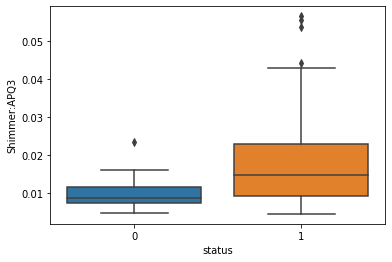

In [43]:
sns.boxplot(x='status', y='Shimmer:APQ3', data=demo)

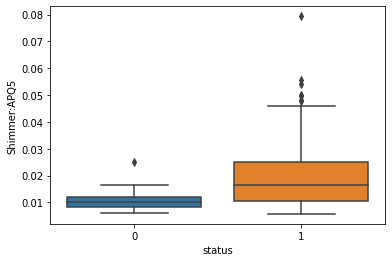

In [44]:
sns.boxplot(x='status', y='Shimmer:APQ5', data=demo)

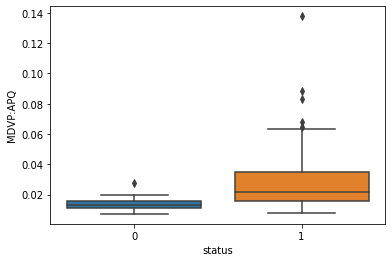

In [45]:
sns.boxplot(x='status', y='MDVP:APQ', data=demo)

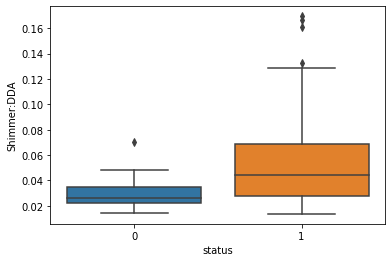

In [46]:
sns.boxplot(x='status', y='Shimmer:DDA', data=demo)

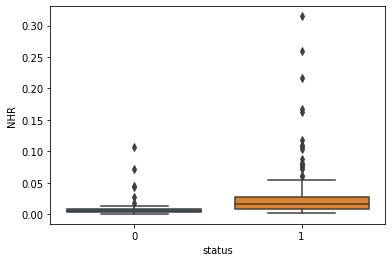

In [47]:
sns.boxplot(x='status', y='NHR', data=demo)

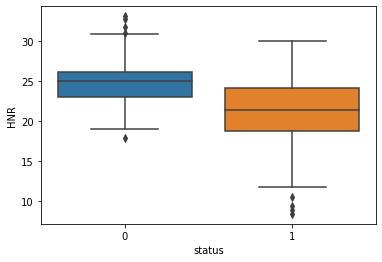

In [48]:
sns.boxplot(x='status', y='HNR', data=demo)

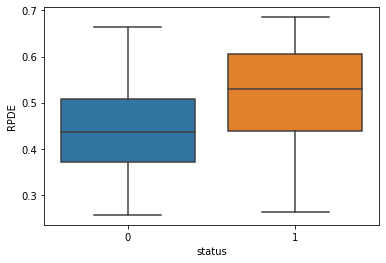

In [49]:
sns.boxplot(x='status', y='RPDE', data=demo)

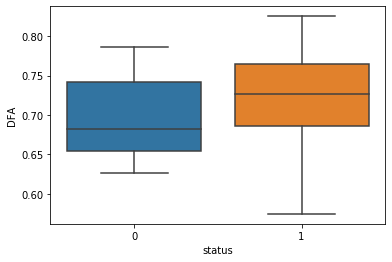

In [50]:
sns.boxplot(x='status', y='DFA', data=demo)

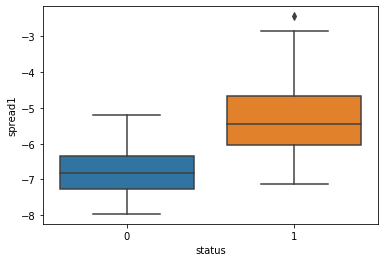

In [51]:
sns.boxplot(x='status', y='spread1', data=demo)

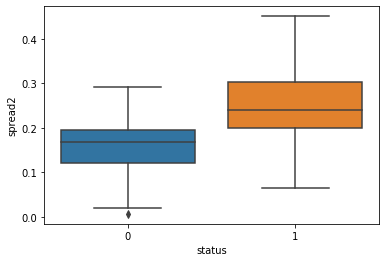

In [52]:
sns.boxplot(x='status', y='spread2', data=demo)

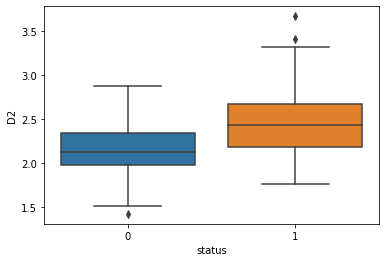

In [53]:
sns.boxplot(x='status', y='D2', data=demo)

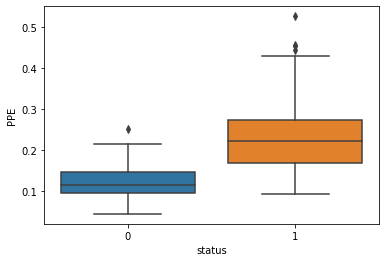

In [54]:
sns.boxplot(x='status', y='PPE', data=demo)

#Except HNR and The Vocal frequencies, all the values/ attributes show that measure of Parkinson's disorder can be taken under concern and can validate better. The vocal frequency may not be an appropriate measure for deciding that a person is suffering from PD. Hence, alongwith vocal frequency, all other attributes add more importance to finalize whether a person is suffering from PD

In [55]:
sns.pairplot(demo, size=3, hue='status')

In [78]:
#Split the dataset into training and test set in the ratio of 70:30

from sklearn.model_selection import train_test_split
y=demo['status']
X = demo.drop(['status', 'name'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=3)

In [79]:
#Create the model using “entropy” method of reducing the entropy and fit it to training data.

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
#Use regularization parameters of max_depth, min_sample_leaf to recreate the model.

dt_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
#What is the impact on the model accuracy? 

#The model can be accurate the more scaled and regularized attributes are used while building the model.
#The very basic question arises while building a model is that whether all the attributes are scaled and not require any 
#amendment while model making

dt_model.score(X_test , y_test)#test of accuracy of a model 

0.8983050847457628

Q: How does regularization help?

Ans:Regularization helps to choose which model best fits our ecpectation to predict the accuracy, so that model is better at predicting. It helps to reduce model complexity. Complexity can be reduced when there are least number of biasing between attributes. It reduces overfitting and underfitting 

In [102]:
predictions = dt_model.predict(X_train)

In [105]:
#Capture the predicted values and do a crosstab

from sklearn.metrics import accuracy_score
accuracy_score(y_train, predictions)# Accuracy leading to 97%

0.9779411764705882

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)

#model = RandomForestClassifier(n_estimators=50, criterion='entropy',max_depth=7, max_leaf_nodes=15)
# Fit on training data
#model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
model.score(X_test , y_test)

0.864406779661017

In [86]:
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

In [69]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)